In [8]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from code import inverse_problem as inv 
from code import direct_problem as dir 

In [9]:
path_to_experimental_data='./experimental_data/BURM7.EXP'
f=open(path_to_experimental_data)
path_to_AB_MN_data=('./experimental_data/'+f.readline()).strip()
f.close()
dat = np.genfromtxt(path_to_experimental_data, comments= '$' , skip_header = 3)
experimental_rhoa = dat.T[2] # измеренные кажущиеся сопротивления
stt=np.genfromtxt(path_to_AB_MN_data,comments= '$')
AB2 = stt.T[0] # Полуразнос

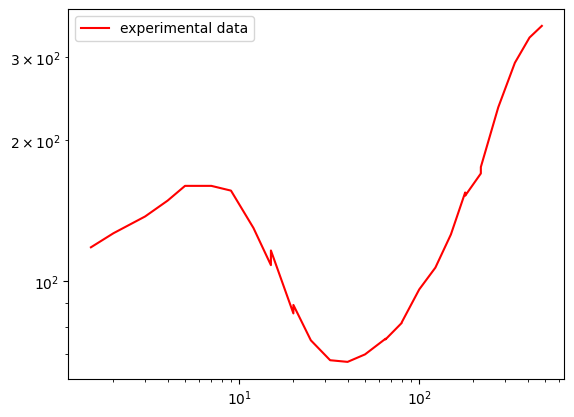

In [10]:
plt.loglog(AB2,experimental_rhoa,c='red', label='experimental data')
plt.legend()

In [11]:
N_layers_list=[5] # список из количества слоёв в моделях
exp_data=np.array([AB2, experimental_rhoa]).T # Данные
method='U'
start=[[100, 1,
        150, 4,
        400, 6,
        15, 40,
        150, 100, 
        800]]
bound=[[(50,150), (0.1,2),
        (100,200), (0.1,8),
        (100,500), (0.1,15),
        (0,100), (0.1,60),
        (100,300), (0.1,150), 
        (200,1000)]]

данные сонета
    70.33     0.58
   208.00     3.85
    80.92     9.23
    50.40    33.14
   215.62   103.32
  1882.95     0.00
start=[[70.33, 0.58, 208, 3.85, 80.92, 9.23, 50.40, 33.14, 215.62, 103.32, 1882.95]]

23.510218378521994


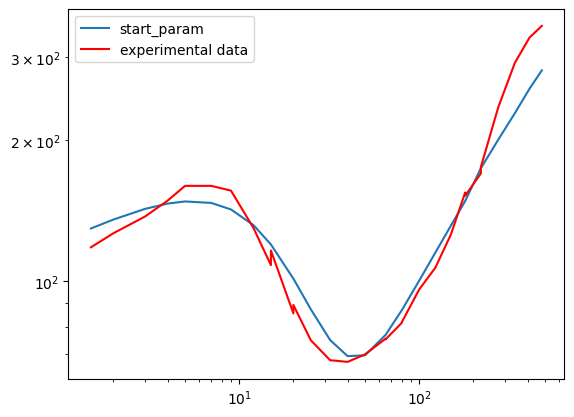

In [12]:
rk_start=[]
for r in AB2:
    rk_start.append(dir.calculate_apparent_resistance(start[0],method,r,num_of_zeros=10*int(1+r/200)))
rk_start=np.array(rk_start)
plt.loglog(AB2,rk_start, label='start_param')
plt.loglog(AB2,experimental_rhoa,c='red', label='experimental data')
plt.legend()

print(inv.RMSE(rk_start,experimental_rhoa))

In [13]:
inv.RMSPE(rk_start,experimental_rhoa)

10.144911746076017

In [21]:
loss='RMSPE'
minim='L-BFGS-B'
inverse=inv.inverse_problem_solver(N_layers_list,method, exp_data, minimization_method=minim, loss_type=loss, start=start,boundaries=bound) 
results=inverse[0] # модели полученные из обратной задачи 
ind=inverse[1] #  индекс модели с наименьшим loss_N_layers в results
print(ind)

In [15]:
#Вывод количества слоёв в модели, её параметров и полученной ошибки
for i in range (len(N_layers_list)):
    print('\nnumber of layers= ', N_layers_list[i], '\nparam =', results[i].x, f'\nloss {loss} =', results[i].fun)


number of layers=  5 
param = [6.23678268e+01 1.31213869e+00 1.50135141e+02 1.00000000e-01
 4.00660237e+02 6.54573300e+00 1.32446114e+01 3.35416284e+01
 1.52739736e+02 9.03665343e+01 8.08161496e+02] 
loss RMSPE = 7.476076932463076


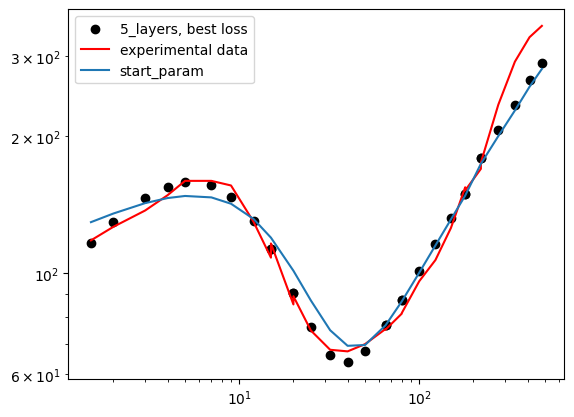

In [16]:
# Визуализация
for i in range(len(N_layers_list)):
    rk=[]
    for r in AB2:
        rk.append(dir.calculate_apparent_resistance(results[i].x,method,r,num_of_zeros=10*int(1+r/200)))
    rk=np.array(rk)
    if i==ind:
        plt.scatter(AB2,rk, c='black',label=f'{N_layers_list[i]}_layers, best loss')
    else: plt.loglog(AB2,rk, label=f'{N_layers_list[i]}_layers')
plt.loglog(AB2,experimental_rhoa,c='red', label='experimental data')
plt.loglog(AB2,rk_start, label='start_param')
plt.legend()

In [19]:
inv.RMSPE(rk,experimental_rhoa)

7.476076932463076

In [20]:
inv.RMSE(rk,experimental_rhoa)

20.17199466423168